### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score

In [2]:
# Classification Problem = Since our target column has categorical data.

train_df = pd.read_csv("C:/Users/bisht/Downloads/train.csv")
test_df = pd.read_csv("C:/Users/bisht/Downloads/test.csv")

print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [3]:
train_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
374,375,0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.0750,NaN,S
518,519,1,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1,0,226875,26.0000,NaN,S
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
788,789,1,3,"Dean, Master. Bertram Vere",male,1.0,1,2,C.A. 2315,20.5750,NaN,S
625,626,0,1,"Sutton, Mr. Frederick",male,61.0,0,0,36963,32.3208,D50,S
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,NaN,S
209,210,1,1,"Blank, Mr. Henry",male,40.0,0,0,112277,31.0000,A31,C


In [4]:
train_df.describe()

# avg age of people in the titanic were 29 years. 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.describe(include = 'object')

# Out of 891 people 577 were males.
# Out of 889 people 644 Embarked from S

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [6]:
train_df.info()      

# Age, Cabin and Embarked Columns have missing data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_df.groupby('Sex', as_index = False).Survived.agg(['count', 'mean'])

# Although men were more but still the females have 74% Survivals

,Sex,count,mean
0,female,314,0.742038
1,male,577,0.188908


In [8]:
train_df.groupby('Embarked', as_index = False).Survived.mean()

# More than 50% people from Embarked C category survived

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [9]:
train_df.groupby('Pclass', as_index = False).Survived.mean()

# Pclass people from 1 have the highest survival rate and following the Pclass 2

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_df.groupby('SibSp', as_index = False).Survived.mean()

# People have 0, 1 and 2 have the highest survival rates and in contrast people with 4, 5 and 6 have close to 0 survivals

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [11]:
train_df.groupby('Parch', as_index = False).Survived.mean()

# People with 1, 2 and 3 Parents Child have >= 50 of survivals

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


### Feature Engineering

In [12]:
# Feature Construction = Creating a new column and add all the people that belong to the same family
train_df['Family'] = train_df.Parch + train_df.SibSp + 1
test_df['Family'] = test_df.Parch + test_df.SibSp + 1

In [13]:
train_df.groupby('Family', as_index = False).Survived.agg(['count', 'mean'])


# Most people were alone and then the next highest family count is for family size of 2 and 3
# People with a Family size of 4 have the highest survival rate and then following the family size of 3, 2 and 1

,Family,count,mean
0,1,537,0.303538
1,2,161,0.552795
2,3,102,0.578431
3,4,29,0.724138
4,5,15,0.200000
5,6,22,0.136364
6,7,12,0.333333
7,8,6,0.000000
8,11,7,0.000000


In [14]:
train_df.Family.unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11])

In [15]:
# Encoding Numerical Data = Binning Age into Categorical Data
family_map = {1 : 'Alone', 2 : 'Small', 3 : 'Small', 4 : 'Small', 5 : 'Medium', 6 : 'Medium', 7 : 'Large',
             8 : 'Large', 11 : 'Large'}

train_df['Family_Size'] = train_df['Family'].map(family_map)
test_df['Family_Size'] = test_df['Family'].map(family_map)

train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Family_Size
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.5000,A26,C,1,Alone
134,135,0,2,"Sobey, Mr. Samuel James Hayden",male,25.0,0,0,C.A. 29178,13.0000,NaN,S,1,Alone
69,70,0,3,"Kink, Mr. Vincenz",male,26.0,2,0,315151,8.6625,NaN,S,3,Small
157,158,0,3,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.0500,NaN,S,1,Alone
272,273,1,2,"Mellinger, Mrs. (Elizabeth Anne Maidment)",female,41.0,0,1,250644,19.5000,NaN,S,2,Small


In [16]:
train_df.groupby('Family_Size', as_index = False).Survived.mean()

# Family_Size Small and Alone have the highest survival rate.

,Family_Size,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


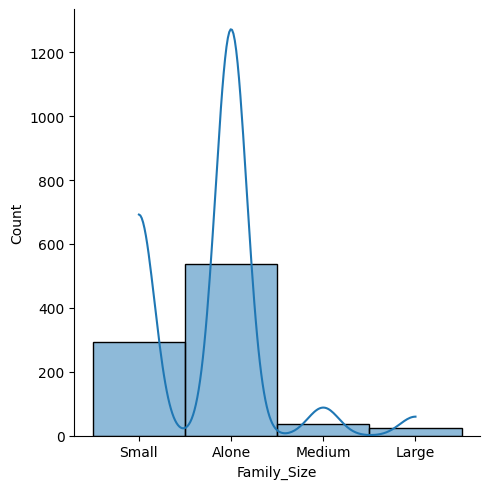

In [17]:
sns.displot(train_df['Family_Size'], kde = True)

# Visualizing the Family_Size column

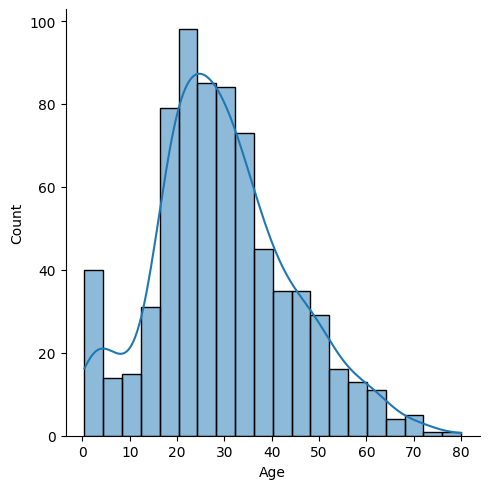

In [18]:
sns.displot(train_df.Age, kde = True)

# Visualizing the Age column

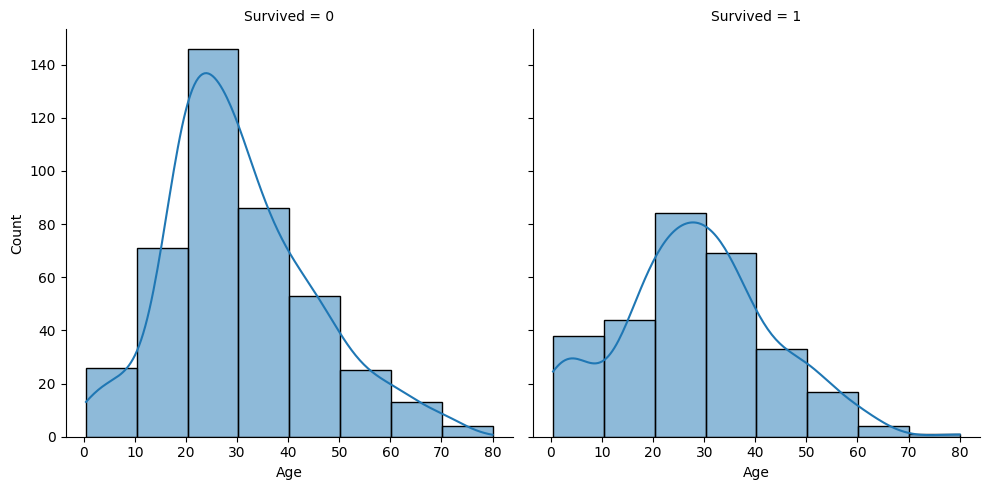

In [19]:
sns.displot(train_df, x = 'Age', col = 'Survived', binwidth = 10, height = 5, kde = True, )

# Relationship of Age column and Survived column

In [20]:
# Dividing the Age column into 8 categories with equal observations
train_df['Age_Category'] = pd.qcut(x = train_df['Age'], q = 8)
test_df['Age_Category'] = pd.qcut(x = test_df['Age'], q = 8)

train_df.groupby('Age_Category', as_index = False, observed = False).Survived.mean()

,Age_Category,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [21]:
# Converting the Age column into categories as per our Age_Category column

train_df.loc[train_df.Age <= 16, 'Age'] = 0
train_df.loc[(train_df.Age > 16) & (train_df.Age <= 20.125), 'Age'] = 1
train_df.loc[(train_df.Age > 20.125) & (train_df.Age <= 24), 'Age'] = 2
train_df.loc[(train_df.Age > 24) & (train_df.Age <= 28), 'Age'] = 3
train_df.loc[(train_df.Age > 28) & (train_df.Age <= 32.312), 'Age'] = 4
train_df.loc[(train_df.Age > 32.312) & (train_df.Age <= 38), 'Age'] = 5
train_df.loc[(train_df.Age > 38) & (train_df.Age <= 47), 'Age'] = 6
train_df.loc[(train_df.Age > 47) & (train_df.Age <= 80), 'Age'] = 7
train_df.loc[train_df.Age > 80, 'Age']


test_df.loc[(test_df.Age > 16) & (test_df.Age <= 20.125), 'Age'] = 1
test_df.loc[(test_df.Age > 20.125) & (test_df.Age <= 24), 'Age'] = 2
test_df.loc[(test_df.Age > 24) & (test_df.Age <= 28), 'Age'] = 3
test_df.loc[(test_df.Age > 28) & (test_df.Age <= 32.312), 'Age'] = 4
test_df.loc[(test_df.Age > 32.312) & (test_df.Age <= 38), 'Age'] = 5
test_df.loc[(test_df.Age > 38) & (test_df.Age <= 47), 'Age'] = 6
test_df.loc[(test_df.Age > 47) & (test_df.Age <= 80), 'Age'] = 7
test_df.loc[test_df.Age > 80, 'Age']


train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Family_Size,Age_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(20.125, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(32.312, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,53.1000,C123,S,2,Small,"(32.312, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,8.0500,NaN,S,1,Alone,"(32.312, 38.0]"


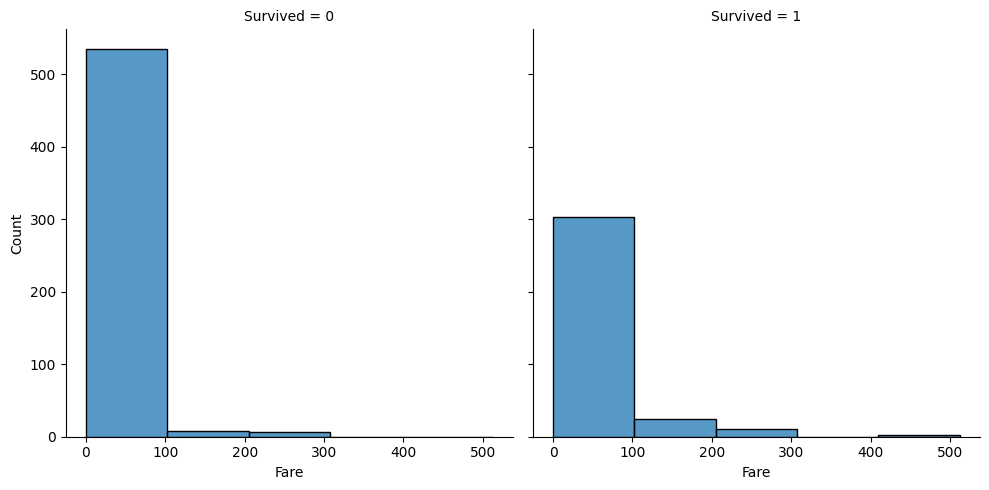

In [22]:
sns.displot(train_df, x = 'Fare', col = 'Survived', binwidth = 100, height = 5)

In [23]:
# Categorizing the Fare Column into 6 different bins
train_df['Fare_Category'] = pd.qcut(x = train_df.Fare, q = 6)
test_df['Fare_Category'] = pd.qcut(x = test_df.Fare, q = 6)

train_df.groupby('Fare_Category', as_index = False, observed = False).Survived.agg(['count', 'mean'])

,Fare_Category,count,mean
0,"(-0.001, 7.775]",156,0.205128
1,"(7.775, 8.662]",152,0.190789
2,"(8.662, 14.454]",139,0.366906
3,"(14.454, 26.0]",149,0.436242
4,"(26.0, 52.369]",146,0.417808
5,"(52.369, 512.329]",149,0.697987


In [24]:
# Converting the Fare column into categories as per our Fare_Category column

train_df.loc[train_df.Fare <= 7.775, 'Fare'] = 0
train_df.loc[(train_df.Fare > 7.775) & (train_df.Fare <= 8.662), 'Fare'] = 1
train_df.loc[(train_df.Fare > 8.662) & (train_df.Fare <= 14.454), 'Fare'] = 2
train_df.loc[(train_df.Fare > 14.454) & (train_df.Fare <= 26), 'Fare'] = 3
train_df.loc[(train_df.Fare > 26) & (train_df.Fare <= 52.369), 'Fare'] = 4
train_df.loc[train_df.Fare > 52.369, 'Fare'] = 5


test_df.loc[test_df.Fare <= 7.775, 'Fare'] = 0
test_df.loc[(test_df.Fare > 7.775) & (test_df.Fare <= 8.662), 'Fare'] = 1
test_df.loc[(test_df.Fare > 8.662) & (test_df.Fare <= 14.454), 'Fare'] = 2
test_df.loc[(test_df.Fare > 14.454) & (test_df.Fare <= 26), 'Fare'] = 3
test_df.loc[(test_df.Fare > 26) & (test_df.Fare <= 52.369), 'Fare'] = 4
test_df.loc[test_df.Fare > 52.369, 'Fare'] = 5

In [25]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Family_Size,Age_Category,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,NaN,S,2,Small,"(20.125, 24.0]","(-0.001, 7.775]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,C85,C,2,Small,"(32.312, 38.0]","(52.369, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,C123,S,2,Small,"(32.312, 38.0]","(52.369, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,NaN,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]"


In [26]:
# Name Col can be divided into 3 parts - first is the Title, Second is First Name, Third is Last Name
train_df.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [27]:
train_df['Title'] = train_df.Name.str.split(', ', expand = True)[1].str.split('.', expand = True)[0].apply(lambda x : x.strip())
test_df['Title'] = test_df.Name.str.split(', ', expand = True)[1].str.split('.', expand = True)[0].apply(lambda x : x.strip())

In [28]:
train_df.groupby('Title', as_index = False).Survived.mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


### This way we can categorize the Title column for the ones whose no's are very small:

##### military = capt, col, major
##### noble = jonkheer, the countess, don, lady, sir
##### unmaried female = mlle, mme, ms

In [29]:
train_df.Title.value_counts()

# since mlle, mme and ms are only 1 or 2 we can categorize them in Nobel category

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [30]:
# Replacing the minority people and categorizing them together
title_map = {'Capt' : 'Military', 'Col' : 'Military', 'Major' : 'Military',
    'Jonkheer' : 'Noble', 'the Countess' : 'Noble','Don' : 'Noble', 'Lady' : 'Noble', 'Sir' : 'Noble',
    'Mlle' : 'Noble', 'Mme' : 'Noble', 'Ms' : 'Noble'}
train_df['Title'] = train_df.Title.replace(title_map)
test_df['Title'] = test_df.Title.replace(title_map)

In [31]:
train_df.groupby('Title', as_index = False, observed = False).Survived.agg(['count', 'mean'])

,Title,count,mean
0,Dr,7,0.428571
1,Master,40,0.575000
2,Military,5,0.400000
3,Miss,182,0.697802
4,Mr,517,0.156673
5,Mrs,125,0.792000
6,Noble,9,0.777778
7,Rev,6,0.000000


In [32]:
# Dropping the column Name since now we do not have any use of it for further analysis
train_df = train_df.drop(columns = 'Name', axis = 1)
test_df = test_df.drop(columns = 'Name', axis = 1)

In [33]:
train_df.Ticket.sample(10)

# Here ticket is divided into 2 parts : class codes and ticket number

710      PC 17482
373      PC 17760
140          2678
673        244270
736    W./C. 6608
118      PC 17558
250        362316
791        239865
499        350035
478        350060
Name: Ticket, dtype: object

In [34]:
# Fetching the ticket number from Ticket column
train_df['Ticket_Number'] = train_df.Ticket.apply(lambda x : pd.Series({'Ticket' : x.split()[-1]}))
test_df['Ticket_Number'] = test_df.Ticket.apply(lambda x : pd.Series({'Ticket' : x.split()[-1]}))

In [35]:
train_df.groupby('Ticket_Number', as_index = False).Survived.agg(['count', 'mean']).sort_values('count', ascending = False)

,Ticket_Number,count,mean
196,2343,7,0.000000
464,347082,7,0.000000
94,1601,7,0.714286
168,2144,6,0.000000
468,347088,6,0.000000
...,...,...,...
674,8475,1,0.000000
675,851,1,0.000000
676,9234,1,1.000000
63,11769,1,1.000000


In [36]:
train_df.groupby("Ticket_Number", as_index = False).Ticket_Number.transform('count')

0      1
1      1
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: Ticket_Number, Length: 891, dtype: int64

In [37]:
# Adding a new column that tells us how many no. of tickets does each Ticket_Number have

train_df['TicketNumberCounts'] = train_df.groupby('Ticket_Number', as_index = False).Ticket_Number.transform('count')
test_df['TicketNumberCounts'] = test_df.groupby('Ticket_Number', as_index = False).Ticket_Number.transform('count')

In [38]:
train_df.groupby('TicketNumberCounts', as_index = False).Survived.agg(['count', 'mean']).sort_values('count', ascending = False)

,TicketNumberCounts,count,mean
0,1,544,0.295956
1,2,188,0.569149
2,3,66,0.712121
3,4,44,0.500000
6,7,21,0.238095
5,6,18,0.000000
4,5,10,0.000000


In [39]:
train_df.Ticket.str.split(pat = ' ', expand = True)

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
886,211536,None,None
887,112053,None,None
888,W./C.,6607,None
889,111369,None,None


In [40]:
# Adding a col TicketLocation from Ticket and wherever the info is not present there we impute 'Blank' word
train_df['TicketLocation'] = np.where(train_df.Ticket.str.split(' ', expand = True)[1].notna(), 
                                     train_df.Ticket.str.split(' ', expand = True)[0].apply(lambda x : x.strip()), 'Blank')
test_df['TicketLocation'] = np.where(test_df.Ticket.str.split(' ', expand = True)[1].notna(), 
                                     test_df.Ticket.str.split(' ', expand = True)[0].apply(lambda x : x.strip()), 'Blank')

In [41]:
train_df.TicketLocation.value_counts().reset_index()

,TicketLocation,count
0,Blank,665
1,PC,60
2,C.A.,27
3,STON/O,12
4,A/5,10
5,W./C.,9
6,CA.,8
7,SOTON/O.Q.,8
8,A/5.,7
9,SOTON/OQ,7


In [42]:
# For Consistency and Cleaner look, replacing the ticket location
train_df.TicketLocation = train_df.TicketLocation.replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C'
})


test_df.TicketLocation = test_df.TicketLocation.replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C'
})

In [43]:
train_df.groupby('TicketLocation', as_index = False).Survived.agg(['count', 'mean']).sort_values('count', ascending = False)

# Most of the Tickets do not have TicketLocation mentioned in it

,TicketLocation,count,mean
4,Blank,665,0.383459
12,PC,60,0.650000
7,CA,41,0.341463
1,A/5,21,0.095238
26,SOTON/OQ,15,0.133333
27,STON/O,12,0.416667
22,SC/Paris,11,0.454545
31,W/C,10,0.100000
0,A/4,6,0.000000
28,STON/O2.,6,0.500000


In [44]:
# Checking the info of cabin column to know how many people were residing in the same cabin.

train_df.Cabin.value_counts().reset_index()

,Cabin,count
0,G6,4
1,C23 C25 C27,4
2,B96 B98,4
3,F2,3
4,D,3
...,...,...
142,E17,1
143,A24,1
144,C50,1
145,B42,1


In [45]:
# # There are a lot of rows in which the cabin details are not updated. Imputing the missing cabin values with 'U'

train_df['Cabin'] = train_df.Cabin.fillna('U')
test_df['Cabin'] = test_df.Cabin.fillna('U')

# Taking the first alphabet for every cabin to get categories of cabin and the count of people in them.
train_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in train_df.Cabin])
test_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in test_df.Cabin])

In [46]:
# Details count and mean of people in distinct cabins

train_df.groupby('Cabin', as_index = False).Survived.agg(['count', 'mean'])

,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000
8,U,687,0.299854


In [47]:
# Creating a new column with these data where the people assigned with a cabin sep and people without cabin are sep.

train_df['Cabin_Assigned'] = train_df.Cabin.apply(lambda x : 0 if x in ['U'] else 1)
test_df['Cabin_Assigned'] = test_df.Cabin.apply(lambda x : 0 if x in ['U'] else 1)

In [48]:
# Count and mean of people with and without cabin

train_df.groupby('Cabin_Assigned', as_index = False).Survived.agg(['count', 'mean'])

,Cabin_Assigned,count,mean
0,0,687,0.299854
1,1,204,0.666667


In [49]:
print(train_df.shape)
print(test_df.shape)

(891, 20)
(418, 19)


In [50]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         891 non-null    int64   
 1   Survived            891 non-null    int64   
 2   Pclass              891 non-null    int64   
 3   Sex                 891 non-null    object  
 4   Age                 714 non-null    float64 
 5   SibSp               891 non-null    int64   
 6   Parch               891 non-null    int64   
 7   Ticket              891 non-null    object  
 8   Fare                891 non-null    float64 
 9   Cabin               891 non-null    object  
 10  Embarked            889 non-null    object  
 11  Family              891 non-null    int64   
 12  Family_Size         891 non-null    object  
 13  Age_Category        714 non-null    category
 14  Fare_Category       891 non-null    category
 15  Title               891 non-null    obje

In [51]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         418 non-null    int64   
 1   Pclass              418 non-null    int64   
 2   Sex                 418 non-null    object  
 3   Age                 332 non-null    float64 
 4   SibSp               418 non-null    int64   
 5   Parch               418 non-null    int64   
 6   Ticket              418 non-null    object  
 7   Fare                417 non-null    float64 
 8   Cabin               418 non-null    object  
 9   Embarked            418 non-null    object  
 10  Family              418 non-null    int64   
 11  Family_Size         418 non-null    object  
 12  Age_Category        332 non-null    category
 13  Fare_Category       417 non-null    category
 14  Title               418 non-null    object  
 15  Ticket_Number       418 non-null    obje

In [52]:
# Imputing mean value in missing rows in Numerical col

train_df.Age = train_df.Age.fillna(train_df.Age.mean())
test_df.Age = test_df.Age.fillna(test_df.Age.mean())
test_df.Fare = test_df.Fare.fillna(test_df.Fare.mean())

In [53]:
# Doing Feature Transformation on nominal categorical cols using OneHotEncoding and 
# oridinal categorical cols using OrdinalEncoding

ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False).set_output(transform = 'pandas')

ode = OrdinalEncoder

SI = SimpleImputer(strategy = 'most_frequent')

ode_cols = ['Family_Size']
ohe_cols = ['Sex', 'Embarked']

In [54]:
# Spliting data into train and valid data using training dataset

X = train_df.drop('Survived', axis = 1)
y = train_df['Survived']

X_test = test_df.drop(['Age_Category', 'Fare_Category'], axis = 1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [55]:
# Creating a pipeline to impute and encode the ode_cols

ordinal_pipeline = Pipeline(steps = [
    ('impute', SimpleImputer(strategy = 'most_frequent')),
    ('ord', OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1))
])

In [56]:
# Creating pipeline to impute the data and One Hot Encode the ohe_cols

ohe_pipeline = Pipeline(steps = [
    ('impute', SimpleImputer(strategy = 'most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown = 'ignore', sparse_output = False).set_output(transform = 'pandas'))
])

In [57]:
# Transforming the data for the columns

col_trans = ColumnTransformer(transformers = [
    ('impute', SI, ['Age']),
    ('ord_pipeline', ordinal_pipeline, ode_cols),
    ('ohe_pipeline', ohe_pipeline, ohe_cols),
    ('passthrough', 'passthrough', ['Pclass', 'TicketNumberCounts', 'Cabin_Assigned', 'Age', 'Fare'])
    ],
    remainder = 'drop', n_jobs = -1)

## Model Building

In [58]:
# Hyperparameter tuning on random forest classifier and cheching the best parameters and best score using this model

rfc = RandomForestClassifier()
param_grid = {
    'n_estimators' : [100, 150, 200],
    'min_samples_split' : [5, 10, 15],
    'max_depth' : [8, 9, 10, 15, 20],
    'min_samples_leaf' : [1, 2, 4],
    'criterion' : ['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = StratifiedKFold(n_splits = 5))

pipefinalrfc = make_pipeline(col_trans, CV_rfc)
pipefinalrfc.fit(X_train, y_train)

print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
0.8244755244755243


In [59]:
# Hyperparameter tuning on decision tree classifier and cheching the best parameters and best score using this model

dtc = DecisionTreeClassifier()
param_grid = {
    'min_samples_split' : [5, 10, 15],
    'max_depth' : [10, 20 , 30],
    'min_samples_leaf' : [1, 2, 4],
    'criterion' : ['gini', 'entropy']
}
CV_dtc = GridSearchCV(estimator = dtc, param_grid = param_grid, cv = StratifiedKFold(n_splits = 5))

pipefinaldtc = make_pipeline(col_trans, CV_dtc)
pipefinaldtc.fit(X_train, y_train)

print(CV_dtc.best_params_)
print(CV_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}
0.807613513247316


In [60]:
# Hyperparameter tuning on K Neighbors classifier and cheching the best parameters and best score using this model

knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors' : [3, 5, 7, 9, 11],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p' : [1, 2]
}
CV_knn = GridSearchCV(estimator = knn, param_grid = param_grid, cv = StratifiedKFold(n_splits = 5))

pipefinalknn = make_pipeline(col_trans, CV_knn)
pipefinalknn.fit(X_train, y_train)

print(CV_knn.best_params_)
print(CV_knn.best_score_)

{'algorithm': 'brute', 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
0.8006697527824288


In [61]:
# Hyperparameter tuning on support vector classifier and cheching the best parameters and best score using this model

svc = SVC()
param_grid = {
    'C' : [100, 10, 1.0, 0.1, 0.001, 0.001],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    
}
CV_svc = GridSearchCV(estimator = svc, param_grid = param_grid, cv = StratifiedKFold(n_splits = 5))

pipefinalsvc = make_pipeline(col_trans, CV_svc)
pipefinalsvc.fit(X_train, y_train)

print(CV_svc.best_params_)
print(CV_svc.best_score_)

{'C': 10, 'kernel': 'rbf'}
0.8203191175022161


In [62]:
# Hyperparameter tuning on logistic regression and cheching the best parameters and best score using this model

lor = LogisticRegression(max_iter=1000)
param_grid = {
    'C' : [100, 10, 1.0, 0.1, 0.001, 0.001]
}
CV_lor = GridSearchCV(estimator = lor, param_grid = param_grid, cv = StratifiedKFold(n_splits = 5))

pipefinallor = make_pipeline(col_trans, CV_lor)
pipefinallor.fit(X_train, y_train)

print(CV_lor.best_params_)
print(CV_lor.best_score_)

{'C': 1.0}
0.7977937555402344


In [63]:
# Hyperparameter tuning on Gaussian Naive Bayes and cheching the best parameters and best score using this model

gnb = GaussianNB()
param_grid = {
    'var_smoothing' : [0.00000001, 0.000000001, 0.00000001]
}
CV_gnb = GridSearchCV(estimator = gnb, param_grid = param_grid, cv = StratifiedKFold(n_splits = 5))

pipefinalgnb = make_pipeline(col_trans, CV_gnb)
pipefinalgnb.fit(X_train, y_train)

print(CV_gnb.best_params_)
print(CV_gnb.best_score_)

{'var_smoothing': 1e-08}
0.7795134443021767


In [64]:
# Preciting their outputs

y_pred = pipefinalrfc.predict(X_test)
y_pred2 = pipefinaldtc.predict(X_test)
y_pred3 = pipefinalknn.predict(X_test)
y_pred4 = pipefinalsvc.predict(X_test)
y_pred5 = pipefinallor.predict(X_test)
y_pred6 = pipefinalgnb.predict(X_test)

In [65]:
# Creating Dataframes for precdicted outcomes and passenger id for each model

random_forest_model = pd.DataFrame({
    'PassengerId' : test_df['PassengerId'],
    'Survived' : y_pred
})

decision_trees_model = pd.DataFrame({
    'PassengerId' : test_df['PassengerId'],
    'Survived' : y_pred2
})

knn_model = pd.DataFrame({
    'PassengerId' : test_df['PassengerId'],
    'Survived' : y_pred3
})

svc_model = pd.DataFrame({
    'PassengerId' : test_df['PassengerId'],
    'Survived' : y_pred4
})

lor_model = pd.DataFrame({
    'PassengerId' : test_df['PassengerId'],
    'Survived' : y_pred5
})

gnb_model = pd.DataFrame({
    'PassengerId' : test_df['PassengerId'],
    'Survived' : y_pred6
})

In [66]:
# Creating a csv file for all those models

random_forest_model.to_csv('rfc_model', index = False)
decision_trees_model.to_csv('dtc_model', index = False)
knn_model.to_csv('knn_model', index = False)
svc_model.to_csv('svc_model', index = False)
lor_model.to_csv('lr_model', index = False)
gnb_model.to_csv('gnb_model', index = False)